<a href="https://colab.research.google.com/github/dwhew/data_science/blob/main/weather.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

What is the nicest city to live in?

Notes
*   warmest?
*   least rain?
*   has snow?
*   score based on all attributes would be the most objective (maybe number of days could be a good counter and then rank/sort. must prioritise attributes)






In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy



## prelim experimention with data

In [2]:
inndf = pd.read_csv(r"https://raw.githubusercontent.com/ds4geo/ds4geo/master/data/timeseries/meteo/Innsbruck_weather_2015-19.csv")
inndf.head()

,date,mean_temp (deg C),min_temp (deg C),max_temp (deg C),mean_pressure (mb),mean_humidity (%),mean_wind (ms-1),precip_sum (mm),month,month-year,year
0,2015-01-01,-3.137500,-7.4,1.0,724.241667,92.458333,1.166667,0.0,Jan,Jan-2015,2015
1,2015-01-02,-3.341667,-9.2,1.5,721.975000,94.875000,1.125000,1.6,Jan,Jan-2015,2015
2,2015-01-03,1.458333,0.4,3.2,717.537500,96.833333,1.791667,13.1,Jan,Jan-2015,2015
3,2015-01-04,2.108333,-0.2,4.6,717.608333,79.291667,3.041667,25.9,Jan,Jan-2015,2015
4,2015-01-05,-0.841667,-5.3,2.4,721.662500,74.875000,2.666667,0.3,Jan,Jan-2015,2015


In [3]:
len(inndf)/365

5.002739726027397

In [4]:
inndf['year'].unique()

array([2015, 2016, 2017, 2018, 2019])

In [5]:
len(inndf.loc[inndf['min_temp (deg C)'] < 0])/5

99.8

In [6]:
inndf.dtypes

date                   object
mean_temp (deg C)     float64
min_temp (deg C)      float64
max_temp (deg C)      float64
mean_pressure (mb)    float64
mean_humidity (%)     float64
mean_wind (ms-1)      float64
precip_sum (mm)       float64
month                  object
month-year             object
year                    int64
dtype: object

In [7]:
inndf['year'].value_counts()

2016    366
2019    365
2018    365
2017    365
2015    365
Name: year, dtype: int64

 # load  city data

In [8]:
#inndf = pd.read_csv(r"https://raw.githubusercontent.com/ds4geo/ds4geo/master/data/timeseries/meteo/Innsbruck_weather_2015-19.csv")
londf = pd.read_csv(r"https://raw.githubusercontent.com/ds4geo/ds4geo/master/data/timeseries/meteo/London_weather_2015-19.csv")
sindf = pd.read_csv(r'https://raw.githubusercontent.com/ds4geo/ds4geo/master/data/timeseries/meteo/Singapore_weather_2015-19.csv')
syddf = pd.read_csv(r'https://raw.githubusercontent.com/ds4geo/ds4geo/master/data/timeseries/meteo/Sydney_weather_2015-19.csv')
tehdf = pd.read_csv(r'https://raw.githubusercontent.com/ds4geo/ds4geo/master/data/timeseries/meteo/Tehran_weather_2015-19.csv')





# by number of days. I.e sunny days, perfect days...

In [9]:
#no. of days without rain (annual average)
inn_nrain = len(inndf[inndf['precip_sum (mm)'] == 0.0]) /5
lon_nrain = len(londf[londf['precip_sum (mm)'] == 0.0]) /5
print(lon_nrain, inn_nrain)

# barometric pressure over 1022.689 mb indicates clear and stable (google.com)

198.0 165.8


In [10]:
#perfect days
inn_perf = inndf[(inndf["precip_sum (mm)"] == 0.0) & (inndf["max_temp (deg C)"] > 25) & (inndf["min_temp (deg C)"] > 10) & (inndf["mean_wind (ms-1)"] < 4)]
inn_perf

,date,mean_temp (deg C),min_temp (deg C),max_temp (deg C),mean_pressure (mb),mean_humidity (%),mean_wind (ms-1),precip_sum (mm),month,month-year,year
137,2015-05-18,18.804167,12.4,27.8,708.341667,62.708333,2.500000,0.0,May,May-2015,2015
155,2015-06-05,24.300000,15.0,32.1,714.460000,59.700000,1.900000,0.0,Jun,Jun-2015,2015
176,2015-06-26,19.410000,10.1,25.7,714.620000,57.400000,2.000000,0.0,Jun,Jun-2015,2015
179,2015-06-29,20.310000,12.6,26.3,714.800000,60.800000,1.600000,0.0,Jun,Jun-2015,2015
180,2015-06-30,21.830000,12.5,29.3,714.460000,58.000000,1.800000,0.0,Jun,Jun-2015,2015
...,...,...,...,...,...,...,...,...,...,...,...
1702,2019-08-30,20.079167,13.3,28.0,715.533333,74.083333,1.750000,0.0,Aug,Aug-2019,2019
1703,2019-08-31,20.912500,13.5,30.1,712.175000,68.958333,3.416667,0.0,Aug,Aug-2019,2019
1718,2019-09-15,18.520833,11.1,27.8,717.195833,75.875000,1.375000,0.0,Sep,Sep-2019,2019
1719,2019-09-16,18.666667,11.7,27.9,713.920833,73.666667,1.416667,0.0,Sep,Sep-2019,2019


In [11]:
#create new dataframe

#assign cities to a list for later use
citylist = ['Innsbruck', 'London', 'Singapore', 'Sydney', 'Tehran']

#assign dfs to list for later iterating
dflist = ['inndf', 'londf', 'syddf', 'syddf', 'tehdf']

citystats = pd.DataFrame({'City': citylist })
citystats['Days of no rain'] = [inn_nrain, lon_nrain, '', '', '']
citystats

,City,Days of no rain
0,Innsbruck,165.8
1,London,198
2,Singapore,
3,Sydney,
4,Tehran,


# group by months

In [12]:
#get average day by month
month_ordered = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

inndf_months = inndf.groupby(by=['month']).mean().reindex(month_ordered).drop(columns=['year'])
londf_months = londf.groupby(by=['month']).mean().reindex(month_ordered).drop(columns=['year'])
sindf_months = sindf.groupby(by=['month']).mean().reindex(month_ordered).drop(columns=['year'])
syddf_months = syddf.groupby(by=['month']).mean().reindex(month_ordered).drop(columns=['year'])
tehdf_months = tehdf.groupby(by=['month']).mean().reindex(month_ordered).drop(columns=['year'])



In [29]:
#compare two data frames 
inndf_months.compare(londf_months, keep_equal=True)

mean_temp (deg C)             ... precip_sum (mm)       
                   self      other  ...            self  other
month                               ...                       
Jan           -1.036986   5.452045  ...          219.48  80.64
Feb            1.459536   5.888956  ...           89.08  56.24
Mar            6.061640   7.928891  ...          139.72  70.08
Apr           10.601215  10.405160  ...          167.62  43.00
May           14.001605  13.945328  ...          320.38  69.24
Jun           18.983879  17.205025  ...          333.20  71.44
Jul           19.910417  19.583573  ...          356.06  74.24
Aug           19.554905  18.449890  ...          463.62  84.16
Sep           14.570158  15.556601  ...          278.86  67.40
Oct           10.473568  12.279683  ...          183.58  69.96
Nov            5.024660   8.424954  ...          127.02  84.56
Dec            0.367959   7.878952  ...          125.96  90.56

[12 rows x 14 columns]

In [14]:
# create new dfs for groupby.sum()
# Here I iterated through a list of the dataframes 'dflist'. this is neater than writing the code for each city but hard to read. would be really usefull for when there are alot more cities. 
# it would also make it easier to add more cities later

for i in dflist:
  exec(str(i) + '_sum = ' + str(i) + '.groupby(by=[\'month\']).sum().reindex(month_ordered)')

# substitute into inndf_months (and divide by no. of years)

for i in dflist:
  exec(str(i) + '_months[\'precip_sum (mm)\'] = ' + str(i) + '_sum[\'precip_sum (mm)\']/5')

#check a df
londf_months


,mean_temp (deg C),min_temp (deg C),max_temp (deg C),mean_pressure (mb),mean_humidity (%),mean_wind (ms-1),precip_sum (mm)
month,,,,,,,
Jan,5.452045,2.170323,8.486452,759.047569,83.969628,4.520082,80.64
Feb,5.888956,2.643262,9.282979,759.464393,80.577975,4.467551,56.24
Mar,7.928891,4.552667,11.810000,758.189557,76.876010,4.769790,70.08
Apr,10.405160,6.032000,15.349333,760.006455,70.594834,3.937399,43.00
May,13.945328,9.387742,19.108387,759.972213,69.518787,4.023179,69.24
Jun,17.205025,12.597333,22.528667,760.063668,69.837063,4.277428,71.44
Jul,19.583573,14.866452,25.020000,759.527604,65.276267,4.183529,74.24
Aug,18.449890,14.087097,23.680645,759.849124,70.730940,4.091937,84.16
Sep,15.556601,11.391333,20.480000,760.780904,74.847995,3.991965,67.40


In [15]:
sindf_months

,mean_temp (deg C),min_temp (deg C),max_temp (deg C),mean_pressure (mb),mean_humidity (%),mean_wind (ms-1),precip_sum (mm)
month,,,,,,,
Jan,27.213433,24.963871,30.930968,756.874839,81.759793,2.839862,5.714839
Feb,27.405762,24.958865,31.416312,757.529965,78.876773,3.498227,3.174468
Mar,28.214435,25.548387,32.508387,756.974735,77.933065,3.039977,2.979355
Apr,28.574750,25.874667,32.849333,756.156083,79.456667,2.342500,5.446667
May,28.847258,26.298065,32.307742,756.005242,80.430645,2.399194,4.634839
Jun,28.561083,26.001333,31.556000,756.277000,79.450000,2.578333,7.650667
Jul,28.643306,26.359355,31.603871,756.296452,77.893548,3.176613,4.423226
Aug,28.608065,26.412903,31.684516,756.269597,76.882258,3.325806,4.781935
Sep,28.381333,25.844667,31.840000,756.683583,77.056667,2.859167,4.710000


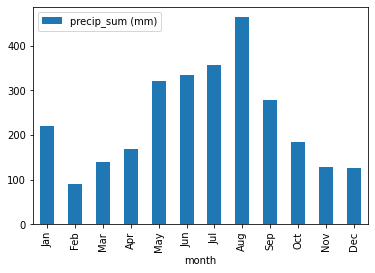

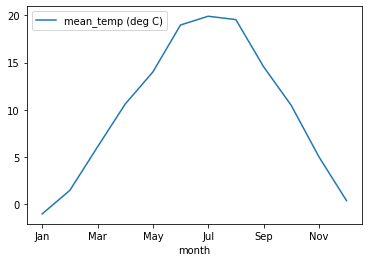

In [16]:
#graphs
inndf_months.plot(y=['precip_sum (mm)'], kind= 'bar')
inndf_months.plot(y=['mean_temp (deg C)'])

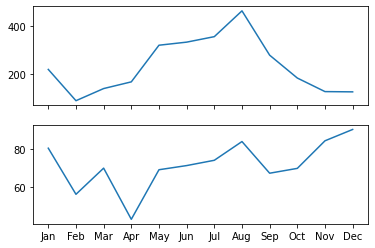

In [17]:
#Plot with subplots (still learning this one, needs work)
fig, (ax, ax1) = plt.subplots(2, sharex=True)

ax.plot(inndf_months['precip_sum (mm)'])
ax1.plot(londf_months['precip_sum (mm)'])


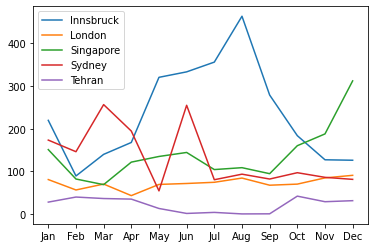

In [26]:
#plot on same graph
plt.plot(inndf_months['precip_sum (mm)'])
plt.plot(londf_months['precip_sum (mm)'])
plt.plot(sindf_months['precip_sum (mm)'])
plt.plot(syddf_months['precip_sum (mm)'])
plt.plot(tehdf_months['precip_sum (mm)'])
plt.legend(citylist)
plt.show()

##inspect singapore rainfall data

       mean_temp (deg C)  min_temp (deg C)  ...  mean_wind (ms-1)  precip_sum (mm)
month                                       ...                                   
Jan            27.213433         24.963871  ...          2.839862           150.88
Feb            27.405762         24.958865  ...          3.498227            81.92
Mar            28.214435         25.548387  ...          3.039977            68.72
Apr            28.574750         25.874667  ...          2.342500           121.52
May            28.847258         26.298065  ...          2.399194           134.80
Jun            28.561083         26.001333  ...          2.578333           144.20
Jul            28.643306         26.359355  ...          3.176613           104.08
Aug            28.608065         26.412903  ...          3.325806           108.52
Sep            28.381333         25.844667  ...          2.859167            94.42
Oct            28.199839         25.443871  ...          2.272043           160.04
Nov 

1826

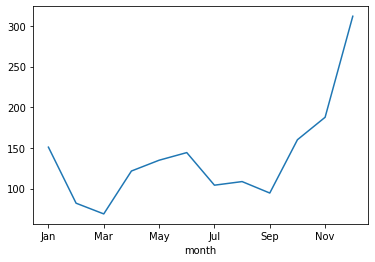

In [27]:
#singapore looks wrong for a city in the tropics
print(sindf_months)
sindf_months['precip_sum (mm)'].plot()

In [28]:
#error with data. 918 days recorded no rain (original df)
len(sindf.loc[sindf['precip_sum (mm)'] == 0])


918

## bring in monthly rainfall data from 'data.gov.sg'

In [21]:
#add data from government website (already uploaded to github)
sinr = pd.read_csv(r'https://raw.githubusercontent.com/dwhew/data_science/main/Singapore-rainfall-monthly-total.csv').rename(columns={'month': 'year-month'})
sinr

,year-month,total_rainfall
0,1982-01,107.1
1,1982-02,27.8
2,1982-03,160.8
3,1982-04,157.0
4,1982-05,102.2
...,...,...
462,2020-07,140.8
463,2020-08,103.4
464,2020-09,150.2
465,2020-10,78.8


In [30]:
#convert to datetime()
sinr['datetime'] = pd.to_datetime(sinr['year-month'])
#extract appropriate years
sinr = sinr.loc[(sinr['datetime'] < '2020-01-01') & (sinr['datetime'] > '2014-12-01')] 
#create month column
sinr['month_name'] = sinr['datetime'].dt.month_name()
#group by month (data doesnt like to have the index changed, so order by new index and then sub in original 'months' index)
month_ordered_long = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
sinr_months = sinr.groupby(by=['month_name']).mean().reindex(month_ordered_long)
#add column for original list month_ordred and set index
sinr_months['month'] = month_ordered
sinr_months.set_index(['month'], inplace=True)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [33]:
sinr_months

,total_rainfall
month,
Jan,150.88
Feb,81.92
Mar,68.72
Apr,121.52
May,134.80
Jun,144.20
Jul,104.08
Aug,108.52
Sep,94.42


In [24]:
#add to original sindf_months df
sindf_months['precip_sum (mm)'] = sinr_months['total_rainfall']
#and run plot again


# statistical comparisons

In [37]:

# Analysis of Variance Test (ANOVA) 
from scipy.stats import f_oneway

#compare mean temperatures between innsbruck and london
stat, p = f_oneway(inndf_months['precip_sum (mm)'], londf_months['precip_sum (mm)'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Not Significantly different')
else:
	print('Significantly different')


stat=23.233, p=0.000
Significantly different
